<a href="https://colab.research.google.com/github/utkarshtambe10/LetsGrowMore-Data-Science-Internship-Tasks/blob/main/Neural_Network_for_Reading_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LetsGrowMore - Advanced Level Task 1
##A Neural Network that can Read Handwriting

Developing a Neural Network that can Read Handwriting with MNIST Dataset.

In [ ]:
import warnings
warnings.filterwarnings('ignore')


#Importing Required Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Importing Required Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


#Data Visualization

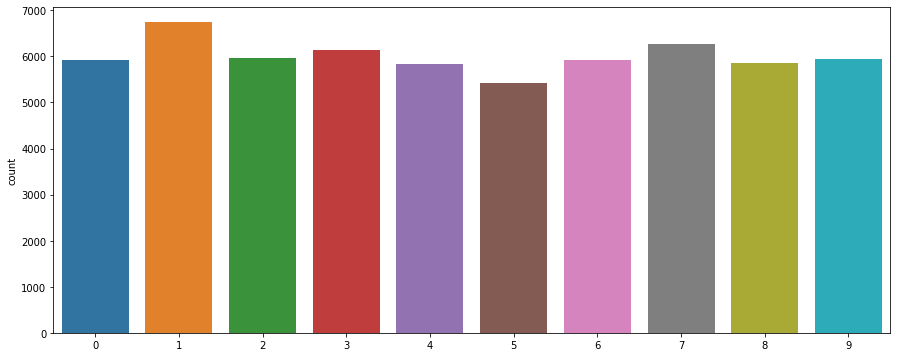

In [ ]:
plt.figure(figsize = (15, 6))
sns.countplot(y_train)


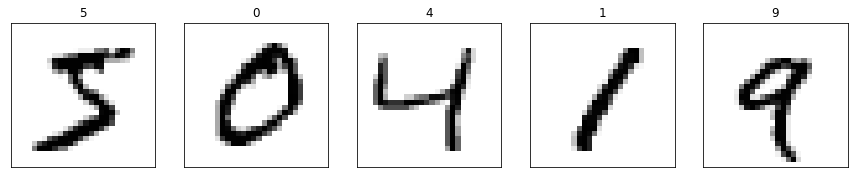

In [ ]:
fig, axes = plt.subplots(ncols = 5, sharex = False, sharey = True, figsize = (15, 6))
for i in range(5):
  axes[i].set_title(y_train[i])
  axes[i].imshow(x_train[i], cmap='gray_r')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
  
plt.show()

#Data Pre-processing

In [ ]:
print('Training images shape: ', x_train.shape)
print('Testing images shape: ', x_test.shape)


Training images shape:  (60000, 28, 28)
Testing images shape:  (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [ ]:
x_train = x_train / 255
x_test = x_test / 255
num_classes = 10


#Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization


In [ ]:
model = Sequential()

model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = tf.nn.relu,
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation = tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation = tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation = tf.nn.softmax))


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

#Model Training

In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
history = model.fit(x = x_train,
                  y = y_train,
                  validation_split = 0.1,
                  epochs = 20)


Epoch 1/20
1688/1688 [==============================] - 26s 9ms/step - loss: 0.2590 - accuracy: 0.9239 - val_loss: 0.1051 - val_accuracy: 0.9732
Epoch 2/20
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1093 - accuracy: 0.9673 - val_loss: 0.1255 - val_accuracy: 0.9747
Epoch 3/20
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0862 - accuracy: 0.9745 - val_loss: 0.1016 - val_accuracy: 0.9825
Epoch 4/20
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0717 - accuracy: 0.9790 - val_loss: 0.0989 - val_accuracy: 0.9852
Epoch 5/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0664 - accuracy: 0.9806 - val_loss: 0.1799 - val_accuracy: 0.9765
Epoch 6/20
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0628 - accuracy: 0.9819 - val_loss: 0.1096 - val_accuracy: 0.9855
Epoch 7/20
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0531 - accuracy: 0.9847 - val_loss: 0.1705 - val_ac

In [ ]:
model.save("model.h5")  #saving the model


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("model.h5")


In [ ]:
loss_and_acc = model.evaluate(x_test, y_test)
print("Test data loss: ", loss_and_acc[0])
print("Test data accuracy: ", loss_and_acc[1] * 100)


313/313 [==============================] - 1s 4ms/step - loss: 0.0527 - accuracy: 0.9917
Test data loss:  0.05273947864770889
Test data accuracy:  99.16999936103821


#Plotting and Validation of Data

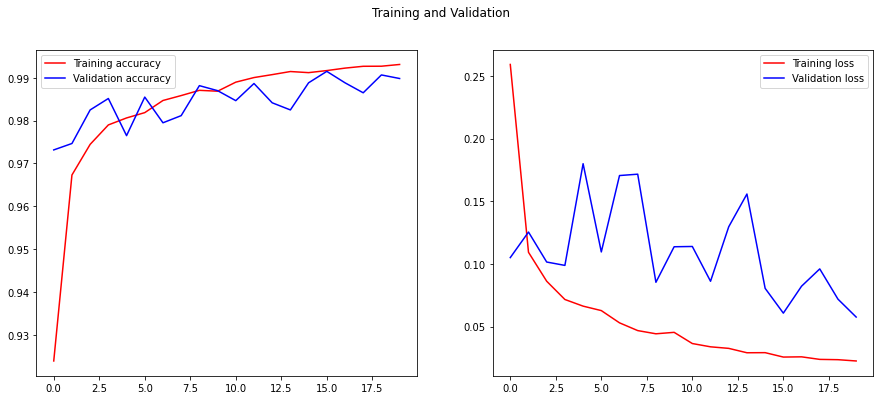

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

ax[0].plot(epochs, acc, color = 'red', label = 'Training accuracy')
ax[0].plot(epochs, val_acc, color = 'blue', label = 'Validation accuracy')
ax[0].legend(loc = 0)

ax[1].plot(epochs, loss, color = 'red', label = 'Training loss')
ax[1].plot(epochs, val_loss, color = 'blue', label = 'Validation loss')
ax[1].legend(loc = 0)

plt.suptitle('Training and Validation')

plt.show()


In [ ]:
y_pred = model.predict(x_test)  #confusion matrix
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)


313/313 [==============================] - 1s 2ms/step


#Heatmap Plotting

Text(141.0, 0.5, 'Truth')

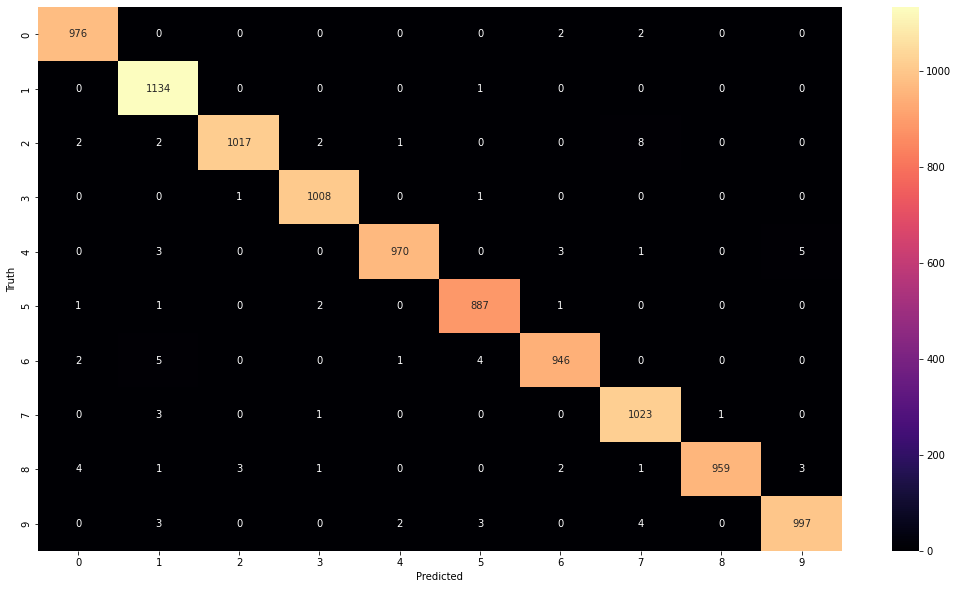

In [ ]:
plt.figure(figsize = (18, 10))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'magma')
plt.xlabel("Predicted", fontsize = 10)
plt.ylabel("Truth", fontsize = 10)


#Testing the Model

313/313 [==============================] - 1s 2ms/step
Predicted Value: 1
Successful Prediction


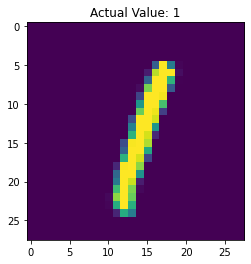

In [ ]:
plt.imshow(tf.squeeze(x_test[5]))
plt.title('Actual Value: {}'.format(y_test[5]))
prediction = model.predict(x_test)

plt.axis('on')
print('Predicted Value:', np.argmax(prediction[5]))
if(y_test[5] == (np.argmax(prediction[5]))):
  print('Successful Prediction')
else:
  print('Unsuccessful Prediction')


313/313 [==============================] - 1s 2ms/step
Predicted Value: 9
Successful Prediction


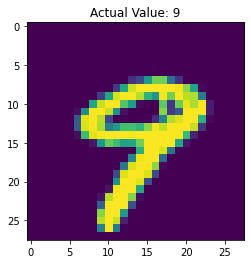

In [ ]:
plt.imshow(tf.squeeze(x_test[9]))
plt.title('Actual Value: {}'.format(y_test[9]))
prediction = model.predict(x_test)

plt.axis('on')
print('Predicted Value:', np.argmax(prediction[9]))
if(y_test[9] == (np.argmax(prediction[9]))):
  print('Successful Prediction')
else:
  print('Unsuccessful Prediction')
